# De las Series a la Transformada de Fourier

<div class="alert alert-block alert-warning">
Este notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, <a href="http://https://www.ing.uc.cl/electrica/">Departamento de Ingeniería Eléctrica</a>, <a href="http://www.uc.cl">Pontificia Universidad Católica de Chile</a>.<br> Profesor: <a href="http://www.rodrigocadiz.com">Rodrigo F. Cádiz</a><br>
Consultas y comentarios: <a href="mailto:rcadiz@ing.puc.cl">rcadiz@ing.puc.cl</a>

</div>

***

## Intuición

Vimos anteriormente que una señal periódica arbitraria, que cumpla con las [condiciones de Dirichlet](https://en.wikipedia.org/wiki/Dirichlet_conditions), es siempre posible de descomponer en una [Serie de Fourier](./12-Series_de_Fourier.ipynb). 

### ¿Qué pasa con una función que no es periódica?

Hay dos formas intuitivas de intentar extender los conceptos de la Serie de Fourier a una señal no periódica.

- Lo primero que puede pensarse es que una señal no periódica, igual puede escribirse como una Serie de Fourier en un intervalo acotado, donde cumpla las condiciones de Dirichlet. Lo que suceda fuera del intervalo de interés, no es relevante y puede considerarse que la serie es periódica fuera de él. Esto se conoce como periodizar una función.

- Lo segundo es pensar una señal no periódica es en realidad una función periódica, pero de período infinito. En este caso, tenemos lo siguiente

$$ T \rightarrow \infty$$

Hay dos aspectos involucrados en la implementación de esta idea: analísis y síntesis. Ambos aspectos sirven para la generalización hacia la Transformada de Fourier. La Transformada de Fourier es la generalización (el caso límite) de los coeficientes de Fourier). A su vez, la Transformada de Fourier inversa es el caso límite de la Serie de Fourier.

Tal como vimos para el caso de la Serie de Fourier, si denotamos por $u$ a una variable que representa frecuencia, hay una relación recíproca entre el periódo de una señal, en el dominio del tiempo o espacio y la frecuencia:

$$ u = \frac{1}{T}$$

Al hacer tender $T \rightarrow \infty$ los espaciamientos en el espectro de frecuencias $1/T$ se hacen cada vez más pequeños. Usaremos ambas intuiciones ahora para intentar derivar la Transformada de Fourier a partir de la Serie.


### Primer intento
Veamos primero si es posible simplemente hacer  $T \rightarrow \infty$ y obtener la Transformada de Fourier a partir de la Serie. Sea $f(t)$ una función tal que tiene soporte compacto, es decir que vale cero fuera del intervalo $|t| < a$, con $a>0,a \in \mathbb{R}$. Podemos periodizar la señal con un periodo $T$ tal que $T > 2a$. De esta forma los coeficientes de Fourier serían

$$ c_k = \frac{1}{T} \int_{-T/2}^{T/2} e^{-i 2 \pi k t/T} f(t) dt $$

Como la señal es cero fuera de $[-a,a]$, entonces los coeficientes se pueden calcular como:

$$ c_k = \frac{1}{T} \int_{-a}^{a} e^{-i 2 \pi k t/T} f(t) dt $$

Entonces tenemos que 

$$ \biggr\rvert \int_{-a}^{a} e^{-i 2 \pi k t/T} f(t) dt \biggr\rvert \leq \int_{-a}^{a} |e^{-i 2 \pi k t/T}| |f(t)| dt $$

Notamos que $|e^{-i 2 \pi k t/T}| = 1$. Además la integral del lado derecho es igual a un número, dado que $f$ tiene soporte compacto, que llamaremos $M$:

$$ \int_{-a}^{a} |f(t)| dt =  M $$

Esto implica que los coeficientes de la Serie de Fourier de esta función periodizada están acotados:

$$ |c_k| \leq \frac{1}{T} M $$ 

Como hay un factor que divide por $T$, a medida que $T \rightarrow \infty$, los coeficientes de Fourier decaen, es decir $c_k \rightarrow 0$. 

Como vemos, esta simple idea no nos sirve para intentar derivar la Transformada de Fourier a partir de la Serie, dado que los coeficientes tienen a cero a medida que el período aumenta.

### Segundo intento
Ahora consideremos una versión escalada por $T$. Consideremos entonces, una transformación $\mathcal{F}$, tal que

$$ \mathcal{F}\{f\}\left(\frac{k}{T}\right) = T c_n = \int_{-T/2}^{T/2} e^{-i 2 \pi k t/T} f(t) dt $$

Su expansión en Series de Fourier sería

$$ f(t) = \sum_{k=-\infty}^{\infty} \mathcal{F}\{f\}\left(\frac{k}{T}\right) e^{i 2 \pi k t/T} \frac{1}{T} $$

Vemos ahora que cuando $T \rightarrow \infty$, la variable discreta $k/T$ se reemplaza por una variable continua $-\infty < u < \infty$.

<div class="alert alert-block alert-info">
<font color="red">Podemos concluir que, para una función no periódica, la energía de la señal no se concentra en algunas frecuencias del espectro, si no que se distribuye en todas las frecuencias. Esto implica que las frecuencias involucradas ya no se indexan mediante una variable discreta, si no por una variable continua. El espectro se convierte en una función contínua en la frecuencia.</font>
</div>

Entonces, tenemos que:

$$ \mathcal{F}\{f\}(u) = \int_{-\infty}^{\infty} e^{-i 2 \pi u t} f(t) dt $$

Y vemos que la expresión para la Serie se reemplaza por una integral


$$ f(t) = \int_{-\infty}^{\infty} \mathcal{F}\{f\}(u) e^{i 2 \pi u t} du $$

Obviamente estas expresiones solo tienen sentido si las integrales también lo tienen. Lamentablemente, en muchos casos de interés, estas expresiones integrales no convergen. Es por esto que es necesario considerar primero el espacio de funciones integrables $L^1$, luego el espacio de funciones cuadrado integrables $L^2$ y finalmente el espacio de las distribuciones temperadas.

<div class="alert alert-block alert-info">
<b>¿De qué se trata la Transformada de Fourier?</b>
La Transformada de Fourier es una herramienta que descompone una señal en sus partes componentes, considerando una variable continua en frecuencia. Estos componentes, tal como para el caso de la Serie de Fourier, se pueden graficar en un espectro donde ya no hay posiciones discretas en frecuencia. A su vez, la transformada inversa permite componer o sintetizar una señal a partir de sus componentes de frecuencia continua.

Dicho de otra forma: <font color="red">Cada señal tiene un espectro y todo espectro determina una señal.
</font>
</div>
    
Veamos ahora un ejemplo en numpy que muestra la comparación entre la Serie y la Transformada de Fourier cuando el período de la señal se hacer crecer.

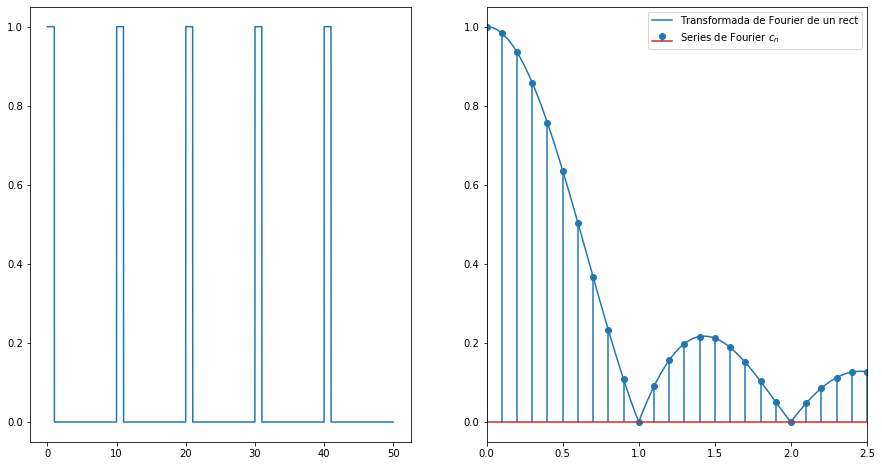

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def fourierSeries_cn(period, N):
    """Cálculo de los coeficientes complejos cn up hasta el N-ésimo armónico"""
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        c_plusn = 1/T * (period * np.exp(-2j*np.pi*n*t/T)).sum()
        c_minusn = 1/T * (period * np.exp(2j*np.pi*n*t/T)).sum()
        result.append((c_plusn, c_minusn))
    return np.array(result)

P=10

Fs = 1000
t = np.arange(0, 50, 1/Fs)
t_period = np.arange(0, P, 1/Fs)
x_p = lambda t: (abs((t % P)-0.5) <= 0.5).astype(float)
x = lambda t: (abs(t-0.5) <= 0.5).astype(float)


plt.figure(figsize=(15,8))
plt.subplot(121)
plt.plot(t, x_p(t))
    
cn = fourierSeries_cn(x_p(t_period), 100)[:,0]
f_discrete = np.arange(len(cn))/P
    
f = np.linspace(0, Fs, len(t), endpoint=False)
X = np.fft.fft(x(t))/Fs
plt.subplot(122)
plt.plot(f, abs(X), label='Transformada de Fourier de un rect')
plt.stem(f_discrete, abs(cn*P), label='Series de Fourier $c_n$',use_line_collection=True)
plt.xlim(0, 2.5)
plt.legend()

plt.show()

<a name="relacion_series_transformada"></a>
***
## Relación formal entre las Series de Fourier y la Transformada de Fourier
Toda distribución períodica de período $T$ $\mathbf{U} \in \mathcal{S}'(\mathbb{R};\mathbb{C})$ puede escribirse como una Serie de Fourier:

$$ \mathbf{U} = \sum_{n \in \mathbb{Z}}c_n(\mathbf{U})e^{i 2 \pi n t/T} \mathbf{1}  $$

Adicionalmente, $\mathbf{U}$ tiene una Transformada de Fourier bien definida:


$$ \mathcal{F}\{\mathbf{U}\} = \sum_{n \in \mathbb{Z}}c_n(\mathbf{U}) \mathcal{F}\{e^{i 2 \pi n t/T} \mathbf{1}\}  =\sum_{n \in \mathbb{Z}}c_n(\mathbf{U}) \mathbf{\delta_{2 \pi n/T}} $$

tal que la Transformada de Fourier $\mathcal{F}\{\mathbf{U}\}$ es una serie de impulsos de Dirac centrados en $2 \pi n t/T$, $n \in \mathbb{Z}$, cada uno escalado por los coeficientes de Fourier $c_n(\mathbf{U})$. 

<div class="alert alert-block alert-info">
<font color="red"><b>Vemos que la Serie de Fourier y la Transformada de Fourier están intrínsecamente relacionadas en el sentido de las distribuciones.</b></font></div>

<div class="alert alert-block alert-warning">
<b>Copyright</b><br>

Estos apuntes están licenciados bajo la licencia <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a>.<br>
Como citar: <i>Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.</i>
</div>